## Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,  #32 training examples will be fed to neural network at a time
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Processing

In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[160.5  146.5  143.5 ]
   [156.   142.   139.  ]
   [159.75 145.75 142.75]
   ...
   [142.75 124.75 120.75]
   [135.5  117.5  113.5 ]
   [141.25 123.25 119.25]]

  [[161.25 147.25 144.25]
   [163.75 149.75 146.75]
   [155.5  141.5  138.5 ]
   ...
   [140.5  122.5  118.5 ]
   [133.25 115.25 111.25]
   [145.5  127.5  123.5 ]]

  [[157.   143.   140.  ]
   [162.25 148.25 145.25]
   [166.25 152.25 149.25]
   ...
   [133.25 115.25 111.25]
   [122.75 104.75 100.75]
   [143.   125.   121.  ]]

  ...

  [[146.25 126.25 119.25]
   [141.25 121.25 114.25]
   [144.75 124.75 117.75]
   ...
   [102.5   75.5   66.5 ]
   [106.    79.    70.  ]
   [110.75  83.75  74.75]]

  [[140.75 120.75 113.75]
   [145.75 125.75 118.75]
   [145.5  125.5  118.5 ]
   ...
   [105.5   78.5   69.5 ]
   [115.75  88.75  79.75]
   [ 98.75  71.75  62.75]]

  [[150.5  130.5  123.5 ]
   [149.75 129.75 122.75]
   [152.5  132.5  125.5 ]
   ...
   [112.25  85.25  76.25]
   [110.75  83.75  74.75]
   [109.25  82.25  7

### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001.
2. There may be chance of underfitting so increase number of neurons.
3. Add more Convolutional Layers to extract more features from images there may be possibilty that model is unable to capture relevant features or model is confusing due to lack of features, so feed with more features.

## Building Model

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

### Building Convolution Layer

In [9]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128, 128, 3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

C:\Users\win 10\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [13]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [14]:
model.add(Dropout(0.25))   #decreases complexity of model hence preventing overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units = 1500, activation = 'relu'))

In [17]:
model.add(Dropout(0.4))  #dropping 40% of neurons

In [18]:
# Output Layer
model.add(Dense(units = 38, activation = 'softmax'))

### Compiling Model

In [19]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5930s 3s/step - accuracy: 0.3861 - loss: 2.1771 - val_accuracy: 0.8282 - val_loss: 0.5494
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4443s 2s/step - accuracy: 0.8320 - loss: 0.5386 - val_accuracy: 0.9103 - val_loss: 0.2744
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4961s 2s/step - accuracy: 0.9045 - loss: 0.2988 - val_accuracy: 0.9366 - val_loss: 0.1952
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4184s 2s/step - accuracy: 0.9333 - loss: 0.1994 - val_accuracy: 0.9472 - val_loss: 0.1641
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5781s 3s/step - accuracy: 0.9516 - loss: 0.1478 - val_accuracy: 0.9589 - val_loss: 0.1253
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5626s 3s/step - accuracy: 0.9638 - loss: 0.1121 - val_accuracy: 0.9572 - val_loss: 0.1314
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4713s 2s/step - accuracy: 0.9666 - loss: 0.0991 - val_accuracy: 0.9631 - val_loss: 0.1213
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4277s 2s/step - accuracy: 0.9740 - loss: 0.07

## Model Evaluation

In [22]:
# Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1880s 856ms/step - accuracy: 0.9851 - loss: 0.0501


In [23]:
print("Training Accuracy : ", train_acc)
print("Training loss : ", train_loss)

Training Accuracy :  0.9868980646133423
Training loss :  0.04351074621081352


In [24]:
# Model Evaluation on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 544s 987ms/step - accuracy: 0.9531 - loss: 0.1605


In [25]:
print("Validation Accuracy : ", val_acc)
print("Validation loss : ", val_loss)

Validation Accuracy :  0.9569200873374939
Validation loss :  0.14840854704380035


### Saving Model

In [26]:
model.save("trained_model.h5")

In [27]:
model.save("trained_model.keras")

In [28]:
# Dictionary of training history
training_history.history      

{'accuracy': [0.5948218107223511,
  0.8571448922157288,
  0.9135358333587646,
  0.9381321668624878,
  0.9554164409637451,
  0.9654883146286011,
  0.9716480374336243,
  0.9759727120399475,
  0.9795148968696594,
  0.981492280960083],
 'loss': [1.3751479387283325,
  0.4531436562538147,
  0.2685844600200653,
  0.18459588289260864,
  0.1371731460094452,
  0.10553046315908432,
  0.08520253002643585,
  0.07236714661121368,
  0.06320295482873917,
  0.05711030215024948],
 'val_accuracy': [0.8281925916671753,
  0.910254955291748,
  0.9366036653518677,
  0.9471887350082397,
  0.9589118957519531,
  0.9572046399116516,
  0.9630662202835083,
  0.9513430595397949,
  0.9650580286979675,
  0.9569200873374939],
 'val_loss': [0.5494392514228821,
  0.27442246675491333,
  0.19515518844127655,
  0.16408464312553406,
  0.1253303587436676,
  0.1313505619764328,
  0.12129825353622437,
  0.16284377872943878,
  0.1219906285405159,
  0.14840850234031677]}

In [29]:
training_history.history['accuracy']

[0.5948218107223511,
 0.8571448922157288,
 0.9135358333587646,
 0.9381321668624878,
 0.9554164409637451,
 0.9654883146286011,
 0.9716480374336243,
 0.9759727120399475,
 0.9795148968696594,
 0.981492280960083]

In [30]:
training_history.history['val_accuracy']

[0.8281925916671753,
 0.910254955291748,
 0.9366036653518677,
 0.9471887350082397,
 0.9589118957519531,
 0.9572046399116516,
 0.9630662202835083,
 0.9513430595397949,
 0.9650580286979675,
 0.9569200873374939]

In [31]:
# Recording History in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

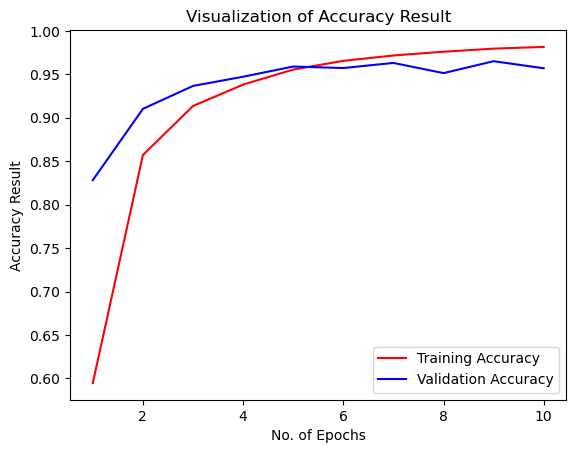

In [32]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 362s 656ms/step


(array([[9.99765694e-01, 7.67297195e-07, 1.41326080e-08, ...,
         1.27223414e-11, 1.18869205e-12, 1.29789665e-10],
        [9.96238470e-01, 3.05706193e-03, 3.61265023e-07, ...,
         2.42647430e-10, 3.72018388e-10, 3.87438703e-08],
        [9.99997854e-01, 8.95895198e-08, 2.76216827e-11, ...,
         8.94796923e-16, 7.17715665e-15, 3.42933228e-13],
        ...,
        [1.63551593e-16, 7.28912383e-19, 7.89697152e-14, ...,
         1.52336218e-18, 9.84742906e-19, 1.00000000e+00],
        [1.18466218e-12, 1.55120735e-14, 4.96754582e-11, ...,
         1.11170906e-13, 2.63205663e-15, 9.99995708e-01],
        [7.52839128e-21, 1.02514222e-20, 1.36280105e-18, ...,
         1.61418359e-21, 1.10934092e-18, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred, axis = 1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
true_categories = tf.concat([y for x, y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.95       504
                                 Apple___Black_rot       0.92      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.93      0.95       440
                                   Apple___healthy       0.93      0.97      0.95       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.89      0.91       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.95      0.

In [43]:
cm = confusion_matrix(Y_true, predicted_categories)
cm, cm.shape

(array([[465,  11,   0, ...,   0,   0,   0],
        [  0, 494,   0, ...,   0,   0,   0],
        [  0,   0, 407, ...,   0,   0,   0],
        ...,
        [  0,   0,   1, ..., 481,   0,   0],
        [  0,   0,   0, ...,   0, 448,   0],
        [  0,   0,   0, ...,   0,   0, 480]], dtype=int64),
 (38, 38))

### Confusion Matrix Visualization

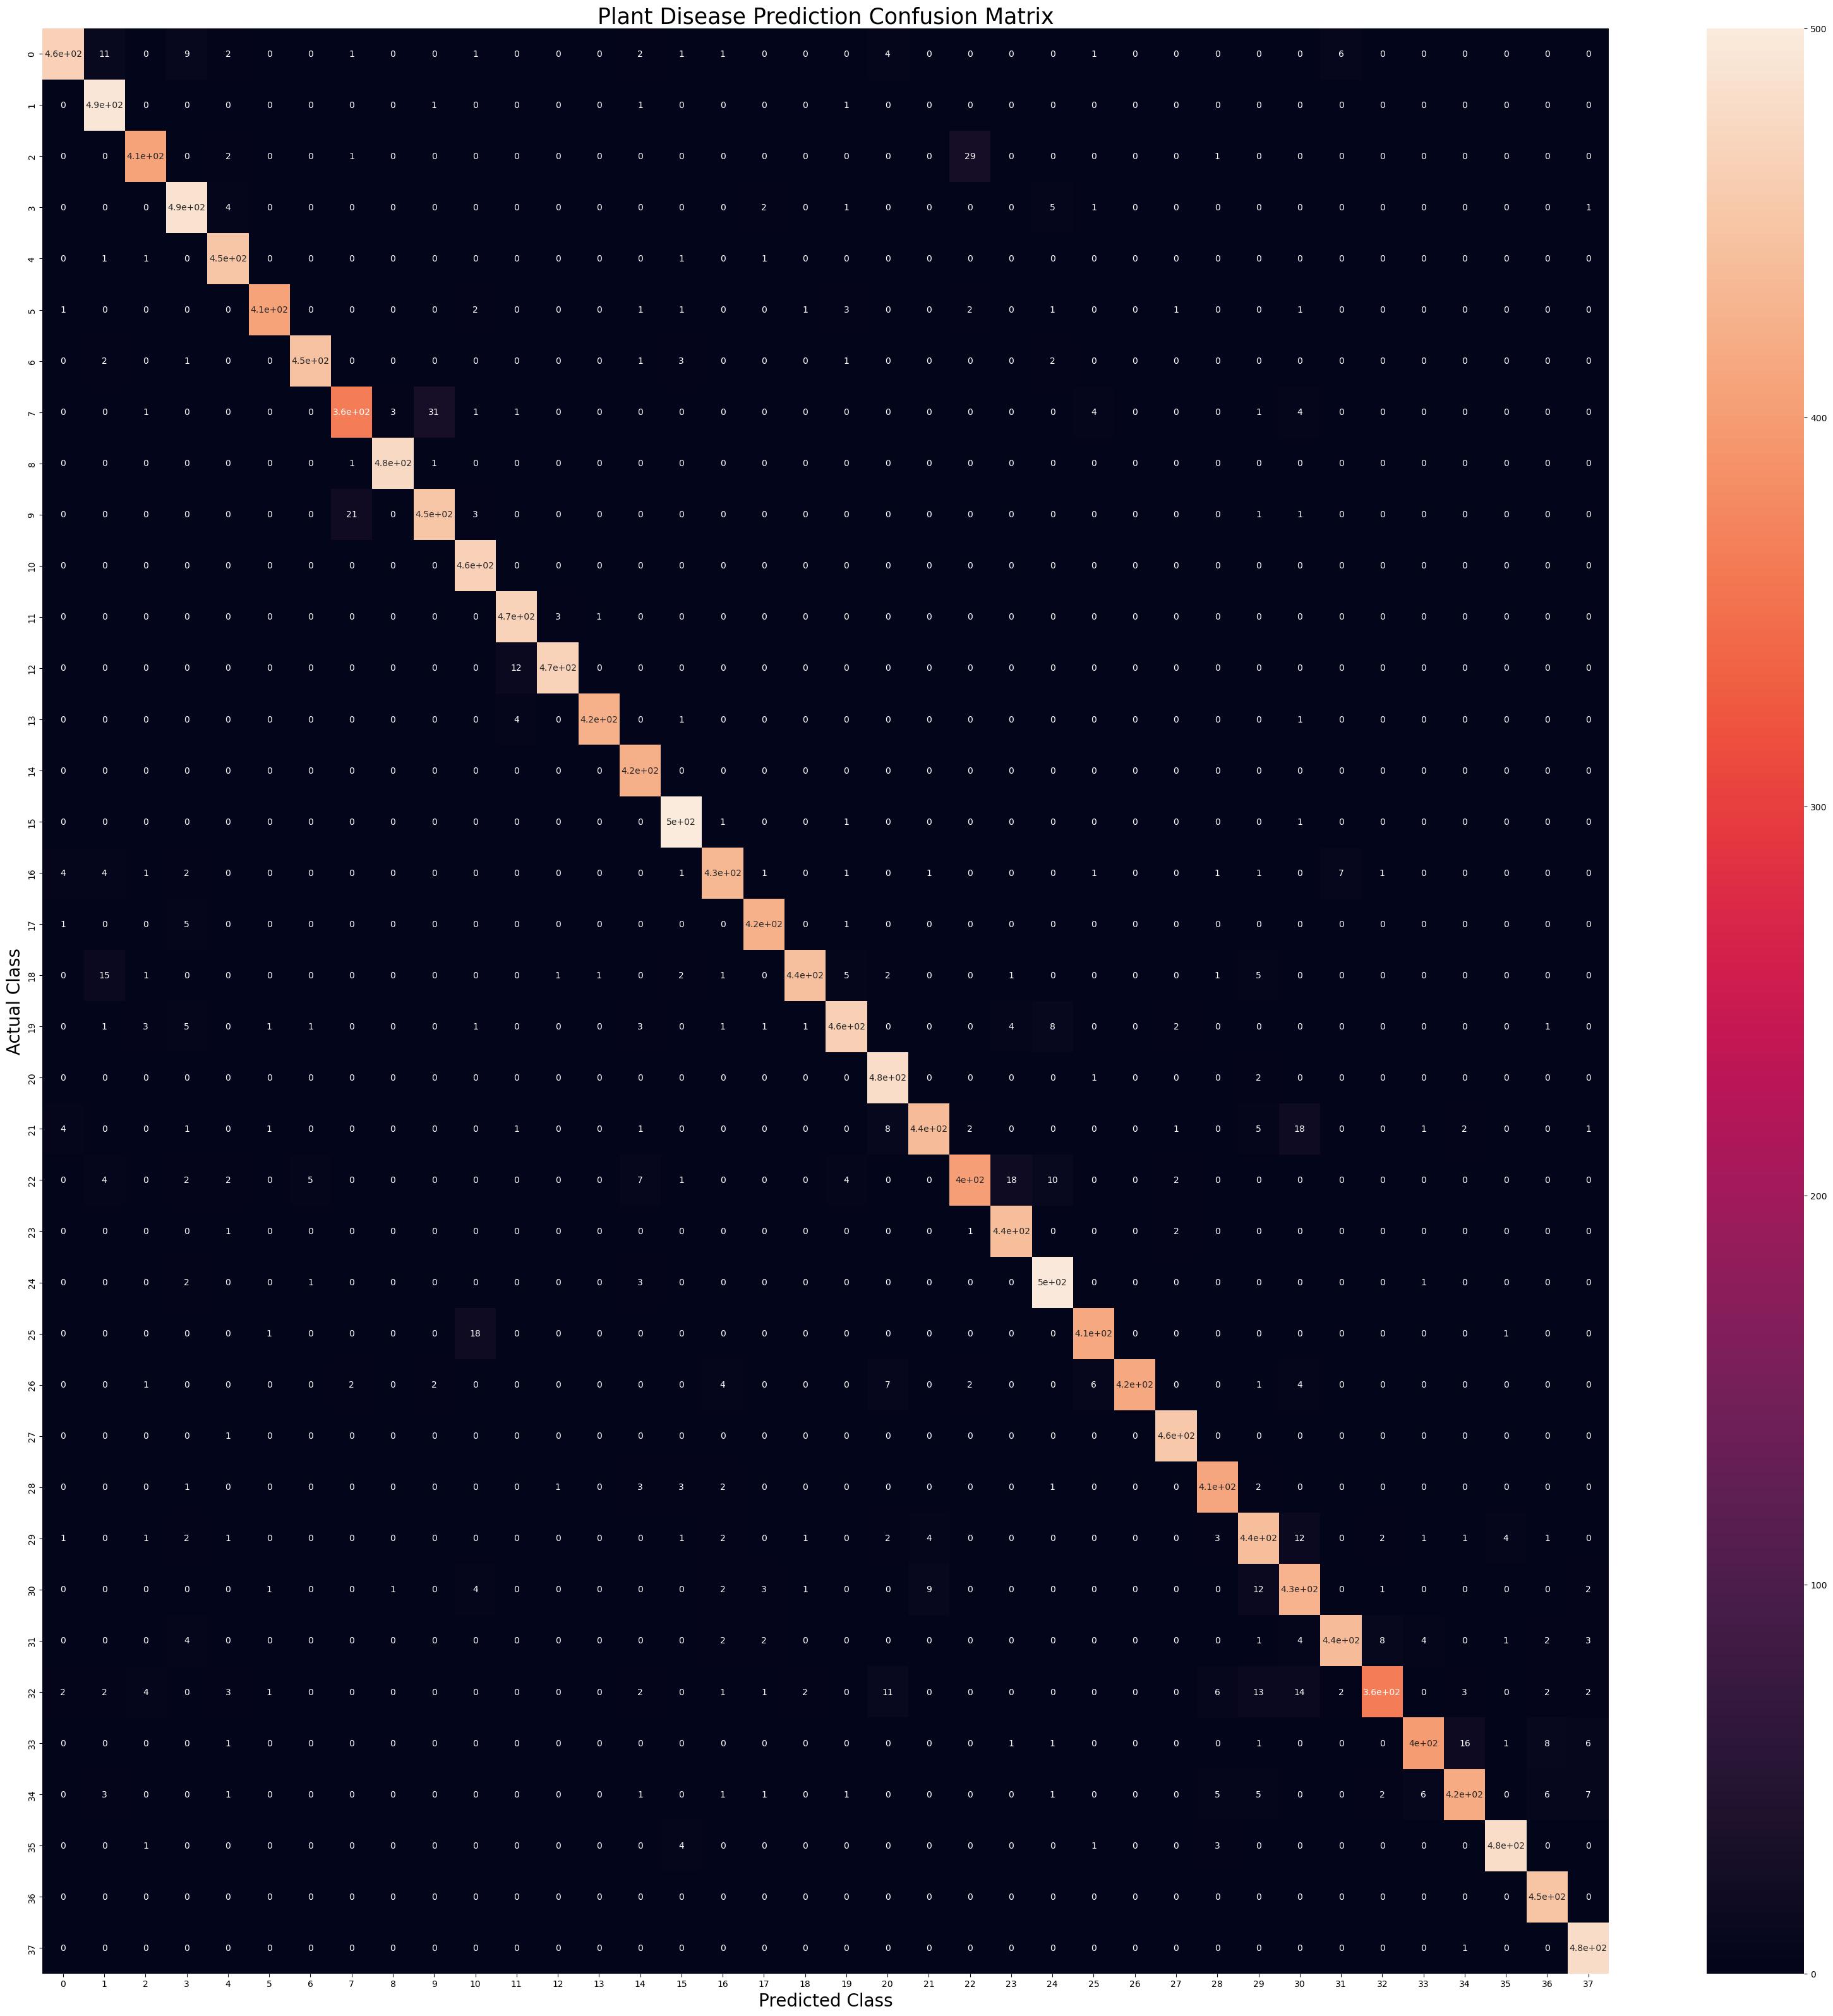

In [44]:
plt.figure(figsize = (40, 40))
sns.heatmap(cm, annot = True, annot_kws = {'size': 10})
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("Actual Class", fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 25)
plt.show()